In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [149]:
data = pd.read_csv("C:/Users/DELL/Downloads/creditcard.csv")

In [150]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [158]:
print(data.isnull().sum())

Time                 0
V1                   0
V2                   0
V3                   0
V4                   0
V5                   0
V6                   0
V7                   0
V8                   0
V9                   0
V10                  0
V11                  0
V12                  0
V13                  0
V14                  0
V15                  0
V16                  0
V17                  0
V18                  0
V19                  0
V20                  0
V21                  0
V22                  0
V23                  0
V24                  0
V25                  0
V26                  0
V27                  0
V28                  0
Amount               0
Class                0
normalized_amount    0
dtype: int64


In [160]:
scaler = StandardScaler()
data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [162]:
data = data.drop(columns=['Amount'])

In [164]:
X = data.drop(columns=['Class'])  
y = data['Class']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

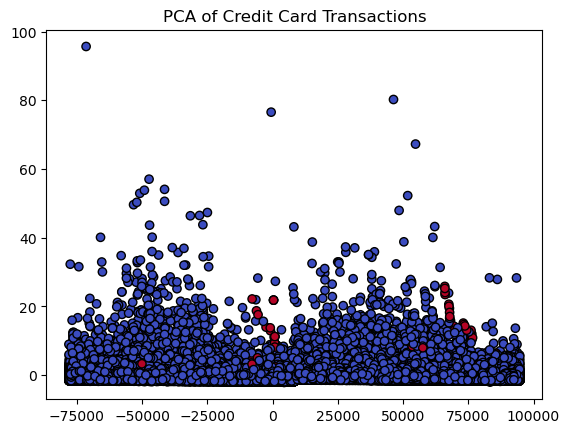

In [174]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('PCA of Credit Card Transactions')
plt.show()

In [180]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [181]:
y_pred = model.predict(X_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



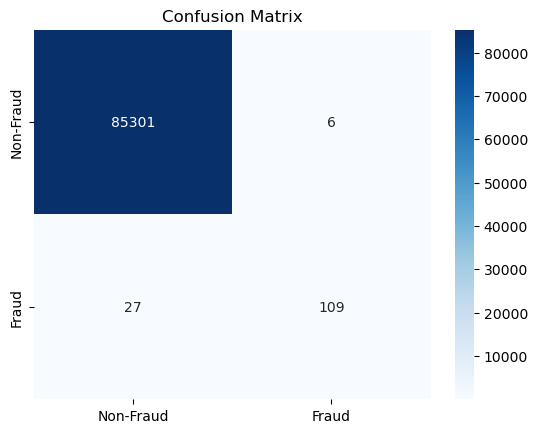

In [183]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.show()

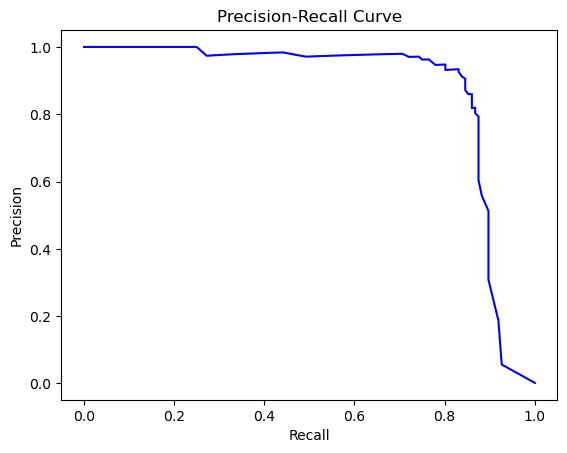

In [184]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [185]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

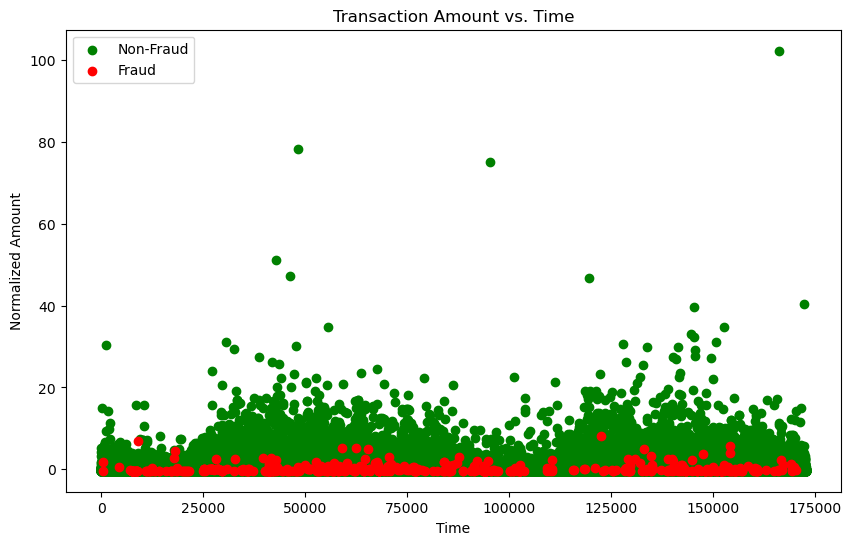

In [186]:
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud['Time'], non_fraud['normalized_amount'], color='green', label='Non-Fraud')
plt.scatter(fraud['Time'], fraud['normalized_amount'], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Normalized Amount')
plt.legend()
plt.title('Transaction Amount vs. Time')
plt.show()

In [ ]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
print("Best parameters:", grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))